In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import gc
import time
from pandas.core.common import SettingWithCopyWarning
import warnings
from collections import Counter
from sklearn.model_selection import GroupKFold
warnings.simplefilter('error', SettingWithCopyWarning)
gc.enable()
%matplotlib inline



In [2]:
train=pd.read_csv("train-flattened.csv")



C:\Users\bapa6\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.columns
train_numeric = train.select_dtypes(include=np.number)
traincat = train.select_dtypes(include=[object])
traincat.columns


Index(['channelGrouping', 'fullVisitorId', 'sessionId', 'socialEngagementType',
       'device.browser', 'device.browserSize', 'device.browserVersion',
       'device.deviceCategory', 'device.flashVersion', 'device.language',
       'device.mobileDeviceBranding', 'device.mobileDeviceInfo',
       'device.mobileDeviceMarketingName', 'device.mobileDeviceModel',
       'device.mobileInputSelector', 'device.operatingSystem',
       'device.operatingSystemVersion', 'device.screenColors',
       'device.screenResolution', 'geoNetwork.city', 'geoNetwork.cityId',
       'geoNetwork.continent', 'geoNetwork.country', 'geoNetwork.latitude',
       'geoNetwork.longitude', 'geoNetwork.metro', 'geoNetwork.networkDomain',
       'geoNetwork.networkLocation', 'geoNetwork.region',
       'geoNetwork.subContinent', 'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.criteriaParameters',
       'trafficSource.adwordsClickInfo.gclId',
  

In [20]:
devtype=traincat.groupby("device.deviceCategory").count()["fullVisitorId"]
browser=traincat.groupby("device.browser").count()["fullVisitorId"]
type(browser)
#matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)

pandas.core.series.Series

In [30]:
browser

device.browser
(not set)                                           8
0                                                   7
ADM                                                 1
Amazon Silk                                       561
Android Browser                                   553
Android Runtime                                     2
Android Webview                                  7865
Apple-iPhone7C2                                     9
BlackBerry                                        184
CSM Click                                           1
Changa 99695759                                     1
Chrome                                         620364
Coc Coc                                           727
DASH_JR_3G                                          4
DoCoMo                                              1
Edge                                            10205
Firefox                                         37069
HTC802t_TD                                          1
Hisense M20-M

In [31]:
browser.index[2]
browser[2]

1

In [118]:
bar1x=[]
bar1y=[]
for i in range(len(browser)):
    bar1x.append(browser.index[i])
    bar1y.append(browser[i])
devicex=[]
devicey=[]
for i in range(len(devtype)):
    devicex.append(devtype.index[i])
    devicey.append(devtype[i])


In [119]:
browsers = ['chrome','safari','firefox','internet explorer','edge','opera','coc coc','maxthon','iron']

for i in range(len(bar1x)):
    x = bar1x[i].lower()
    if x in browsers:
        bar1x[i]=bar1x[i].lower()
    elif  ('android' in x) or ('samsung' in x) or ('mini' in x) or ('iphone' in x) or ('in-app' in x) or ('playstation' in x) or ('mozilla' in x) or ('chrome' in x) or ('blackberry' in x) or ('nokia' in x) or ('browser' in x) or ('amazon' in x) or ('lunascape' in x) or ('netscape' in x) or ('blackberry' in x) or ('konqueror' in x) or ('puffin' in x):
        bar1x[i] = 'mobile browser'
    #elif  ('mozilla' in x) or ('chrome' in x) or ('blackberry' in x) or ('nokia' in x) or ('browser' in x) or ('amazon' in x):
     #   bar1x[i] = 'mobile browser'
    #elif  ('lunascape' in x) or ('netscape' in x) or ('blackberry' in x) or ('konqueror' in x) or ('puffin' in x) or ('amazon' in x):
     #   bar1x[i] = 'mobile browser'        
    else:
        bar1x[i] = 'others'
bar1x

['others',
 'others',
 'others',
 'mobile browser',
 'mobile browser',
 'mobile browser',
 'mobile browser',
 'mobile browser',
 'mobile browser',
 'others',
 'others',
 'chrome',
 'coc coc',
 'others',
 'others',
 'edge',
 'firefox',
 'others',
 'others',
 'mobile browser',
 'internet explorer',
 'iron',
 'mobile browser',
 'others',
 'others',
 'mobile browser',
 'others',
 'mobile browser',
 'mobile browser',
 'maxthon',
 'mobile browser',
 'mobile browser',
 'mobile browser',
 'mobile browser',
 'mobile browser',
 'mobile browser',
 'opera',
 'mobile browser',
 'mobile browser',
 'others',
 'safari',
 'mobile browser',
 'others',
 'others',
 'others',
 'others',
 'mobile browser',
 'others',
 'others',
 'mobile browser',
 'others',
 'others',
 'others',
 'others']

In [61]:
browsers = ['chrome','safari','firefox','internet explorer','edge','opera','coc coc','maxthon','iron']

for i in range(len(bar1x)):
    x = bar1x[i].lower()
    if x in browsers:
        bar1x[i]=bar1x[i].lower()
    elif  ('android' in x) or ('samsung' in x) or ('mini' in x) or ('iphone' in x) or ('in-app' in x) or ('playstation' in x):
        bar1x[i] = 'mobile browser'
    elif  ('mozilla' in x) or ('chrome' in x) or ('blackberry' in x) or ('nokia' in x) or ('browser' in x) or ('amazon' in x):
        bar1x[i] = 'mobile browser'
    elif  ('lunascape' in x) or ('netscape' in x) or ('blackberry' in x) or ('konqueror' in x) or ('puffin' in x) or ('amazon' in x):
        bar1x[i] = 'mobile browser'        
    else:
        bar1x[i] = 'others'

['others',
 'others',
 'others',
 'mobile browser',
 'mobile browser',
 'mobile browser',
 'mobile browser',
 'mobile browser',
 'mobile browser',
 'others',
 'others',
 'chrome',
 'coc coc',
 'others',
 'others',
 'edge',
 'firefox',
 'others',
 'others',
 'mobile browser',
 'internet explorer',
 'iron',
 'mobile browser',
 'others',
 'others',
 'mobile browser',
 'others',
 'mobile browser',
 'mobile browser',
 'maxthon',
 'mobile browser',
 'mobile browser',
 'mobile browser',
 'mobile browser',
 'mobile browser',
 'mobile browser',
 'opera',
 'mobile browser',
 'mobile browser',
 'others',
 'safari',
 'mobile browser',
 'others',
 'others',
 'others',
 'others',
 'mobile browser',
 'others',
 'others',
 'mobile browser',
 'others',
 'others',
 'others',
 'others']

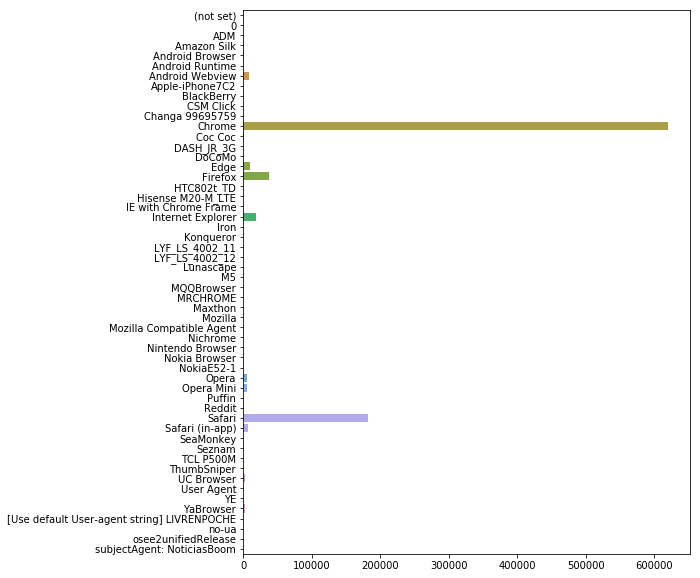

In [76]:
plt.figure(figsize=(8, 10))
sns.barplot(x=bar1y, y=bar1x,width)

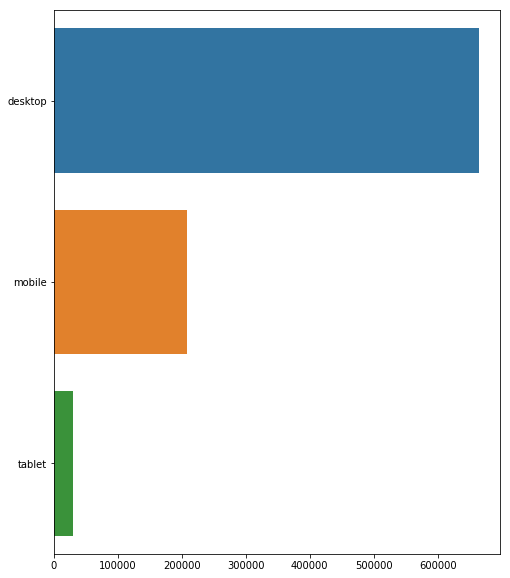

In [122]:
plt.figure(figsize=(8, 10))
sns.barplot(x=devicey, y=devicex)

In [113]:
#for i in range(len(bar1x)):
 #   bar1x[i]=bar1x[i].lower()
#bar1x = bar1x.lower()
bar1x = [x.lower() for x in bar1x]
bar1x=pd.DataFrame(bar1x)
browsers = ['chrome','safari','firefox','internet explorer','edge','opera','coc coc','maxthon','iron']
def replace_source(data, list_sources):
    for source in list_sources:
        data = data.apply(lambda x: source if source in str(x) else x)
    return data
list_sources = browsers  # Add your sources
bar1x[0] = replace_source(bar1x[0], list_sources)
bar1x

,0
0,(not set)
1,0
2,adm
3,amazon silk
4,android browser
5,android runtime
6,android webview
7,apple-iphone7c2
8,blackberry
9,csm click


In [109]:
bar1x[0]

0                                       (not set)
1                                               0
2                                             adm
3                                     amazon silk
4                                 android browser
5                                 android runtime
6                                 android webview
7                                 apple-iphone7c2
8                                      blackberry
9                                       csm click
10                                changa 99695759
11                                         chrome
12                                        coc coc
13                                     dash_jr_3g
14                                         docomo
15                                           edge
16                                        firefox
17                                     htc802t_td
18                              hisense m20-m_lte
19                           ie with chrome frame
